In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
import re

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')  
else:
    device = torch.device('cpu')  
    print("GPU не доступен, обучение будет выполняться на CPU.")

GPU не доступен, обучение будет выполняться на CPU.


In [3]:
df = pd.read_csv('/kaggle/input/nosu-ml/Dataset (1).csv')

In [4]:
df

,ym:s:date,ym:s:ipAddress,ym:s:visitDuration,ym:s:isNewUser,ym:s:daysSinceFirstVisit,ym:s:endURL,ym:s:previousVisitDate,ym:s:ageInterval,ym:s:regionArea,ym:s:userVisits,ym:s:pageviews,ym:s:avgVisitDurationSeconds,ym:s:pageDepth,ym:s:bounceRate
0,2020-06-25,109.172.58.xxx,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0
1,2020-06-25,109.196.217.xxx,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0
2,2020-06-25,109.205.148.xxx,22,New users,0,http://nosu.ru/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,2.0,22.0,2.0,0.0
3,2020-06-25,109.205.149.xxx,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0
4,2020-06-25,109.205.149.xxx,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,95.161.223.xxx,15,New users,0,https://nosu.ru/,0000-00-00,Not specified,Saint-Petersburg and Leningrad Oblast,1,1.0,15.0,1.0,0.0
1411458,2024-03-01,95.167.247.xxx,14,Returning users,16,https://nosu.ru/abiturientam/postuplenie/bakal...,2024-02-14,Not specified,Chechen Republic,2,1.0,14.0,1.0,0.0
1411459,2024-03-01,95.214.211.xxx,259,New users,0,https://nosu.ru/facultet/it/kafedry/kafedra-pr...,0000-00-00,Not specified,Without an area,1,3.0,259.0,3.0,0.0
1411460,2024-03-01,95.25.38.xxx,15,Returning users,0,https://nosu.ru/struktura-universiteta/inye-st...,2024-02-29,Age 55+,Stavropol Krai,3,1.0,15.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411462 entries, 0 to 1411461
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ym:s:date                      1411462 non-null  object 
 1   ym:s:ipAddress                 1411462 non-null  object 
 2   ym:s:visitDuration             1411462 non-null  int64  
 3   ym:s:isNewUser                 1411462 non-null  object 
 4    ym:s:daysSinceFirstVisit      1411462 non-null  int64  
 5   ym:s:endURL                    1411462 non-null  object 
 6   ym:s:previousVisitDate         1411462 non-null  object 
 7   ym:s:ageInterval               1411462 non-null  object 
 8   ym:s:regionArea                1411462 non-null  object 
 9    ym:s:userVisits               1411462 non-null  int64  
 10  ym:s:pageviews                 1411462 non-null  float64
 11   ym:s:avgVisitDurationSeconds  1411462 non-null  float64
 12   ym:s:pageDept

In [6]:
df.rename(columns=lambda x: x.strip().replace('ym:s:', ''), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411462 entries, 0 to 1411461
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   date                     1411462 non-null  object 
 1   ipAddress                1411462 non-null  object 
 2   visitDuration            1411462 non-null  int64  
 3   isNewUser                1411462 non-null  object 
 4   daysSinceFirstVisit      1411462 non-null  int64  
 5   endURL                   1411462 non-null  object 
 6   previousVisitDate        1411462 non-null  object 
 7   ageInterval              1411462 non-null  object 
 8   regionArea               1411462 non-null  object 
 9   userVisits               1411462 non-null  int64  
 10  pageviews                1411462 non-null  float64
 11  avgVisitDurationSeconds  1411462 non-null  float64
 12  pageDepth                1411462 non-null  float64
 13  bounceRate               1411462 non-null 

In [8]:
missing_values = df.isnull().sum()

max_column_length = max(len(column) for column in df.columns)

for column, missing_count in missing_values.items():
    print(f'{column:<{max_column_length}} - {missing_count}')

date                    - 0
ipAddress               - 0
visitDuration           - 0
isNewUser               - 0
daysSinceFirstVisit     - 0
endURL                  - 0
previousVisitDate       - 0
ageInterval             - 0
regionArea              - 0
userVisits              - 0
pageviews               - 0
avgVisitDurationSeconds - 0
pageDepth               - 0
bounceRate              - 0


In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [10]:
df = df.drop(columns=['ipAddress'], errors='ignore')

In [11]:
def extract_info(url):
    faculty_match = re.search(r'/facultet/(\w+)/', url)
    faculty = faculty_match.group(1) if faculty_match else None

    if 'postuplenie' in url and faculty:
        return f"postuplenie , {faculty}"
    elif 'sotrudnikam' in url:
        return "sotrudnikam"
    elif 'postuplenie' in url:
        return "postuplenie"
    elif 'studentam' in url:
        return "studentam"
    elif 'magistratura' in url:
        return "magistratura"
    elif 'nauka' in url:
        return "nauka"
    elif 'aspirant' in url:
        return "aspirant"
    elif faculty:
        return f"{faculty}"
    else:
        return "Unknown"

df['faculty_info'] = df['endURL'].apply(extract_info)


In [12]:
df.head()

,date,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
0,2020-06-25,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0,postuplenie
1,2020-06-25,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0,postuplenie
2,2020-06-25,22,New users,0,http://nosu.ru/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,2.0,22.0,2.0,0.0,Unknown
3,2020-06-25,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0,postuplenie
4,2020-06-25,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0,postuplenie


In [13]:
faculty_info_distribution = df['faculty_info'].value_counts()
faculty_info_distribution

faculty_info
Unknown           649224
postuplenie       366857
sotrudnikam       118726
studentam          41344
jur                37452
econ               26730
nauka              24176
farma              19837
psych              18760
it                 15262
history            13167
chem               11161
inyaz              10238
mo                  8930
aspirant            8289
art                 7652
fizteh              7002
rusfil              5291
journ               5143
fizk                4821
osfil               4309
geo                 4086
magistratura        2986
kafedry               10
administracija         7
social                 2
Name: count, dtype: int64

In [14]:
data_postuplenie = df[df['faculty_info'] == 'postuplenie']
data_postuplenie_for_save = data_postuplenie.copy()
data_postuplenie.shape

(366857, 14)

In [15]:
data_postuplenie

,date,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
0,2020-06-25,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0,postuplenie
1,2020-06-25,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0,postuplenie
3,2020-06-25,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0,postuplenie
4,2020-06-25,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0,postuplenie
16,2020-06-25,98,New users,0,http://nosu.ru/abiturientam/postuplenie/bakala...,0000-00-00,Not specified,Not specified,1,4.0,98.0,4.0,0.0,postuplenie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411433,2024-03-01,47,Returning users,10,https://nosu.ru/abiturientam/postuplenie/,2024-03-01,Age 25‑34,Republic of North Ossetia — Alania,3,4.0,47.0,4.0,0.0,postuplenie
1411434,2024-03-01,55,Returning users,27,https://nosu.ru/abiturientam/postuplenie/,2024-02-02,Not specified,Republic of North Ossetia — Alania,2,1.0,55.0,1.0,0.0,postuplenie
1411435,2024-03-01,143,New users,0,https://nosu.ru/abiturientam/postuplenie/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,7.0,143.0,7.0,0.0,postuplenie
1411449,2024-03-01,28,New users,0,https://nosu.ru/abiturientam/postuplenie/,0000-00-00,Not specified,Not specified,1,2.0,28.0,2.0,0.0,postuplenie


In [16]:
categorical_cols = ['isNewUser', 'ageInterval', 'regionArea', 'faculty_info']

le = LabelEncoder()
for col in categorical_cols:
    data_postuplenie[col] = le.fit_transform(data_postuplenie[col])

/tmp/ipykernel_30/517534436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_postuplenie[col] = le.fit_transform(data_postuplenie[col])
/tmp/ipykernel_30/517534436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_postuplenie[col] = le.fit_transform(data_postuplenie[col])
/tmp/ipykernel_30/517534436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [17]:
data_postuplenie = data_postuplenie.drop(columns=['endURL'], axis=1)

In [18]:
data_postuplenie

,date,visitDuration,isNewUser,daysSinceFirstVisit,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
0,2020-06-25,10,0,0,0000-00-00,3,198,1,2.0,10.0,2.0,0.0,0
1,2020-06-25,20,0,0,0000-00-00,2,122,1,2.0,20.0,2.0,0.0,0
3,2020-06-25,30,0,0,0000-00-00,0,205,1,2.0,30.0,2.0,0.0,0
4,2020-06-25,283,1,0,2020-06-25,0,205,2,9.0,283.0,9.0,0.0,0
16,2020-06-25,98,0,0,0000-00-00,5,166,1,4.0,98.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411433,2024-03-01,47,1,10,2024-03-01,1,205,3,4.0,47.0,4.0,0.0,0
1411434,2024-03-01,55,1,27,2024-02-02,5,205,2,1.0,55.0,1.0,0.0,0
1411435,2024-03-01,143,0,0,0000-00-00,5,205,1,7.0,143.0,7.0,0.0,0
1411449,2024-03-01,28,0,0,0000-00-00,5,166,1,2.0,28.0,2.0,0.0,0


In [19]:
scaler = StandardScaler()
numeric_cols = data_postuplenie.select_dtypes(include=['float64', 'int64']).columns
data_postuplenie[numeric_cols] = scaler.fit_transform(data_postuplenie[numeric_cols])

In [20]:
data_postuplenie

,date,visitDuration,isNewUser,daysSinceFirstVisit,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
0,2020-06-25,-0.469675,-1.501269,-0.393792,0000-00-00,-0.110910,0.248529,-0.346474,-0.358669,-0.469675,-0.357623,-0.35886,0.0
1,2020-06-25,-0.453571,-1.501269,-0.393792,0000-00-00,-0.548321,-1.438927,-0.346474,-0.358669,-0.453571,-0.357623,-0.35886,0.0
3,2020-06-25,-0.437466,-1.501269,-0.393792,0000-00-00,-1.423144,0.403953,-0.346474,-0.358669,-0.437466,-0.357623,-0.35886,0.0
4,2020-06-25,-0.030029,0.666103,-0.393792,2020-06-25,-1.423144,0.403953,-0.329355,1.301208,-0.030029,1.301971,-0.35886,0.0
16,2020-06-25,-0.327958,-1.501269,-0.393792,0000-00-00,0.763913,-0.461979,-0.346474,0.115581,-0.327958,0.116547,-0.35886,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411433,2024-03-01,-0.410089,0.666103,-0.304017,2024-03-01,-0.985733,0.403953,-0.312235,0.115581,-0.410089,0.116547,-0.35886,0.0
1411434,2024-03-01,-0.397206,0.666103,-0.151400,2024-02-02,0.763913,0.403953,-0.329355,-0.595795,-0.397206,-0.594708,-0.35886,0.0
1411435,2024-03-01,-0.255488,-1.501269,-0.393792,0000-00-00,0.763913,0.403953,-0.346474,0.826957,-0.255488,0.827802,-0.35886,0.0
1411449,2024-03-01,-0.440687,-1.501269,-0.393792,0000-00-00,0.763913,-0.461979,-0.346474,-0.358669,-0.440687,-0.357623,-0.35886,0.0


In [21]:
# data_postuplenie_numeric = data_postuplenie.select_dtypes(include=[np.number])

# eps_values = [0.5]
# min_samples_values = [150, 200, 300, 400, 500]

# results = []

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         print(f"\nОбучение DBSCAN с eps={eps} и min_samples={min_samples}")
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
#         clusters = dbscan.fit_predict(data_postuplenie_numeric)
        
#         n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
#         noise_points = list(clusters).count(-1)
        
#         if n_clusters > 1:
#             silhouette_avg = silhouette_score(data_postuplenie_numeric, clusters)
#         else:
#             silhouette_avg = -1  
#         results.append({
#             'eps': eps,
#             'min_samples': min_samples,
#             'n_clusters': n_clusters,
#             'noise_points': noise_points,
#             'silhouette_avg': silhouette_avg
#         })
        
#         print(f"Найдено кластеров (без учета шума): {n_clusters}")
#         print(f"Число шумовых точек: {noise_points}")
#         print(f"Silhouette Score: {silhouette_avg:.3f}")

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(data_postuplenie_numeric)

# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
# plt.title('DBSCAN Clustering Results with PCA')
# plt.xlabel('Первая главная компонента')
# plt.ylabel('Вторая главная компонента')
# plt.colorbar(label='Метка кластера')
# plt.show()

# df_results = pd.DataFrame(results)
# print(df_results)


Обучение DBSCAN с eps=0.5 и min_samples=150
Найдено кластеров (без учета шума): 10
Число шумовых точек: 67430
Silhouette Score: 0.167

Обучение DBSCAN с eps=0.5 и min_samples=200
Найдено кластеров (без учета шума): 9
Число шумовых точек: 74968
Silhouette Score: 0.164

Обучение DBSCAN с eps=0.5 и min_samples=300
Найдено кластеров (без учета шума): 8
Число шумовых точек: 87262
Silhouette Score: 0.153

Обучение DBSCAN с eps=0.5 и min_samples=400
Найдено кластеров (без учета шума): 10
Число шумовых точек: 95782
Silhouette Score: 0.142

Обучение DBSCAN с eps=0.5 и min_samples=500
Найдено кластеров (без учета шума): 9
Число шумовых точек: 102732
Silhouette Score: 0.109


   eps  min_samples  n_clusters  noise_points  silhouette_avg
0  0.5          150          10         67430        0.167356
1  0.5          200           9         74968        0.164272
2  0.5          300           8         87262        0.153490
3  0.5          400          10         95782        0.141538
4  0.5          500           9        102732        0.108698

--------------------------------------------------------------------------------

Обучение DBSCAN с eps=0.5 и min_samples=200
Найдено кластеров (без учета шума): 18
Число шумовых точек: 216106
Silhouette Score: -0.518

Обучение DBSCAN с eps=0.5 и min_samples=300
Найдено кластеров (без учета шума): 12
Число шумовых точек: 217485
Silhouette Score: -0.529

Обучение DBSCAN с eps=0.5 и min_samples=400
Найдено кластеров (без учета шума): 6
Число шумовых точек: 219407
Silhouette Score: -0.542

Обучение DBSCAN с eps=0.5 и min_samples=500
Найдено кластеров (без учета шума): 4
Число шумовых точек: 220230
Silhouette Score: -0.549

Обучение DBSCAN с eps=0.7 и min_samples=200
Найдено кластеров (без учета шума): 18
Число шумовых точек: 216106
Silhouette Score: -0.518

Обучение DBSCAN с eps=0.7 и min_samples=300Обучение DBSCAN с eps=0.5 и min_samples=200
Найдено кластеров (без учета шума): 18
Число шумовых точек: 216106
Silhouette Score: -0.518

Обучение DBSCAN с eps=0.5 и min_samples=300
Найдено кластеров (без учета шума): 12
Число шумовых точек: 217485
Silhouette Score: -0.529

Обучение DBSCAN с eps=0.5 и min_samples=400
Найдено кластеров (без учета шума): 6
Число шумовых точек: 219407
Silhouette Score: -0.542

Обучение DBSCAN с eps=0.5 и min_samples=500
Найдено кластеров (без учета шума): 4
Число шумовых точек: 220230
Silhouette Score: -0.549

Обучение DBSCAN с eps=0.7 и min_samples=200
Найдено кластеров (без учета шума): 18
Число шумовых точек: 216106
Silhouette Score: -0.518

Обучение DBSCAN с eps=0.7 и min_samples=300
Найдено кластеров (без учета шума): 12
Число шумовых точек: 217485
Silhouette Score: -0.529

Обучение DBSCAN с eps=0.7 и min_samples=400
Найдено кластеров (без учета шума): 6
Число шумовых точек: 219407
Silhouette Score: -0.542

Обучение DBSCAN с eps=0.7 и min_samples=500
Найдено кластеров (без учета шума): 4
Число шумовых точек: 220230
Silhouette Score: -0.549

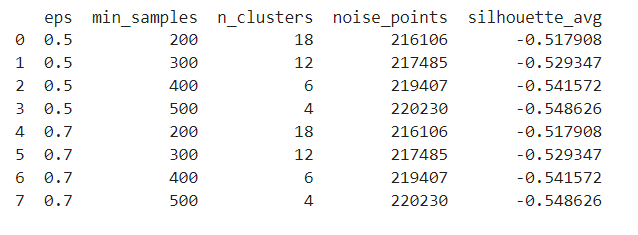

# KMEANS

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество найденных кластеров: 18
Метки кластеров (первые 100): [ 7  1  7 17  1  7  0  1  1  7 17  7 13  7 17 17  7  7 17  3  5  7 17 17
  7  3  7  3  3  7  7  7  5  7  3  7  0  7  1  7  7 17  1  1  1  1  3  3
  1  1  3  8  3 13 17  1  8  1  7  7  7  7  6  7  7  6 14  7  7  7  7 15
  7  7 17  7  3  7  7  5  7  7  0 13  7 17 15  5  7  7  7 17  3 17  7  2
  7 15  7  7]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

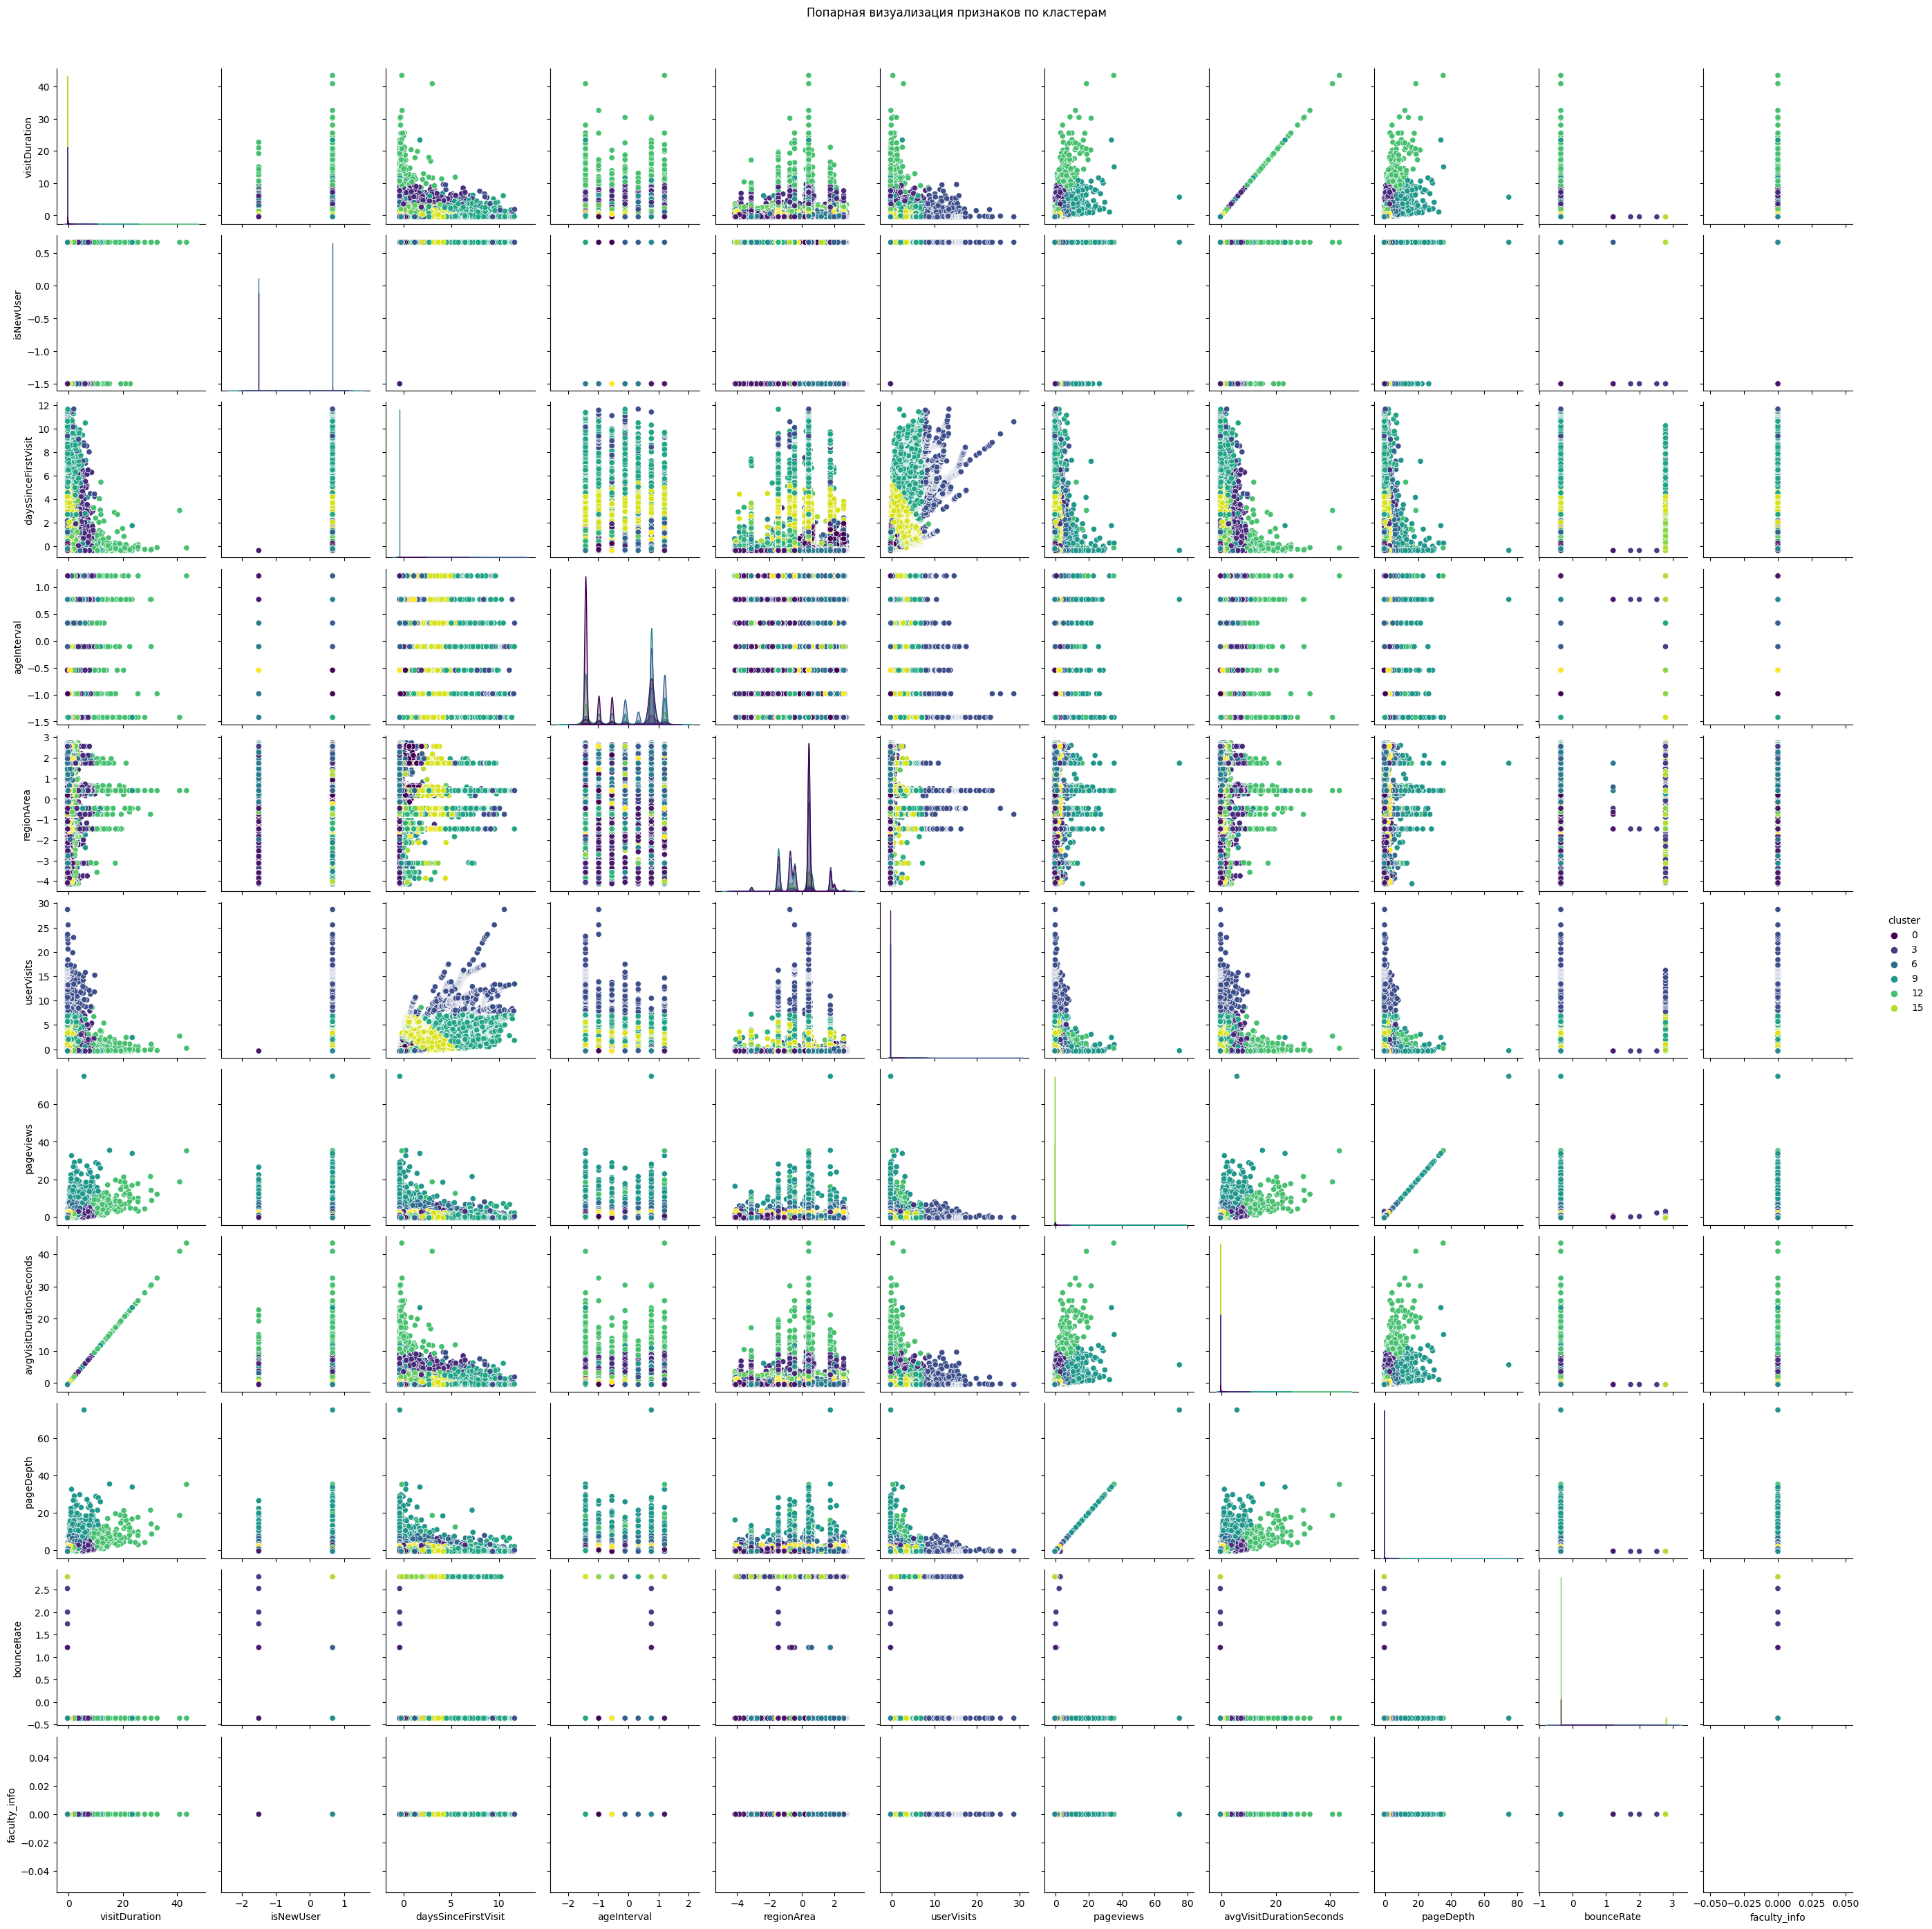

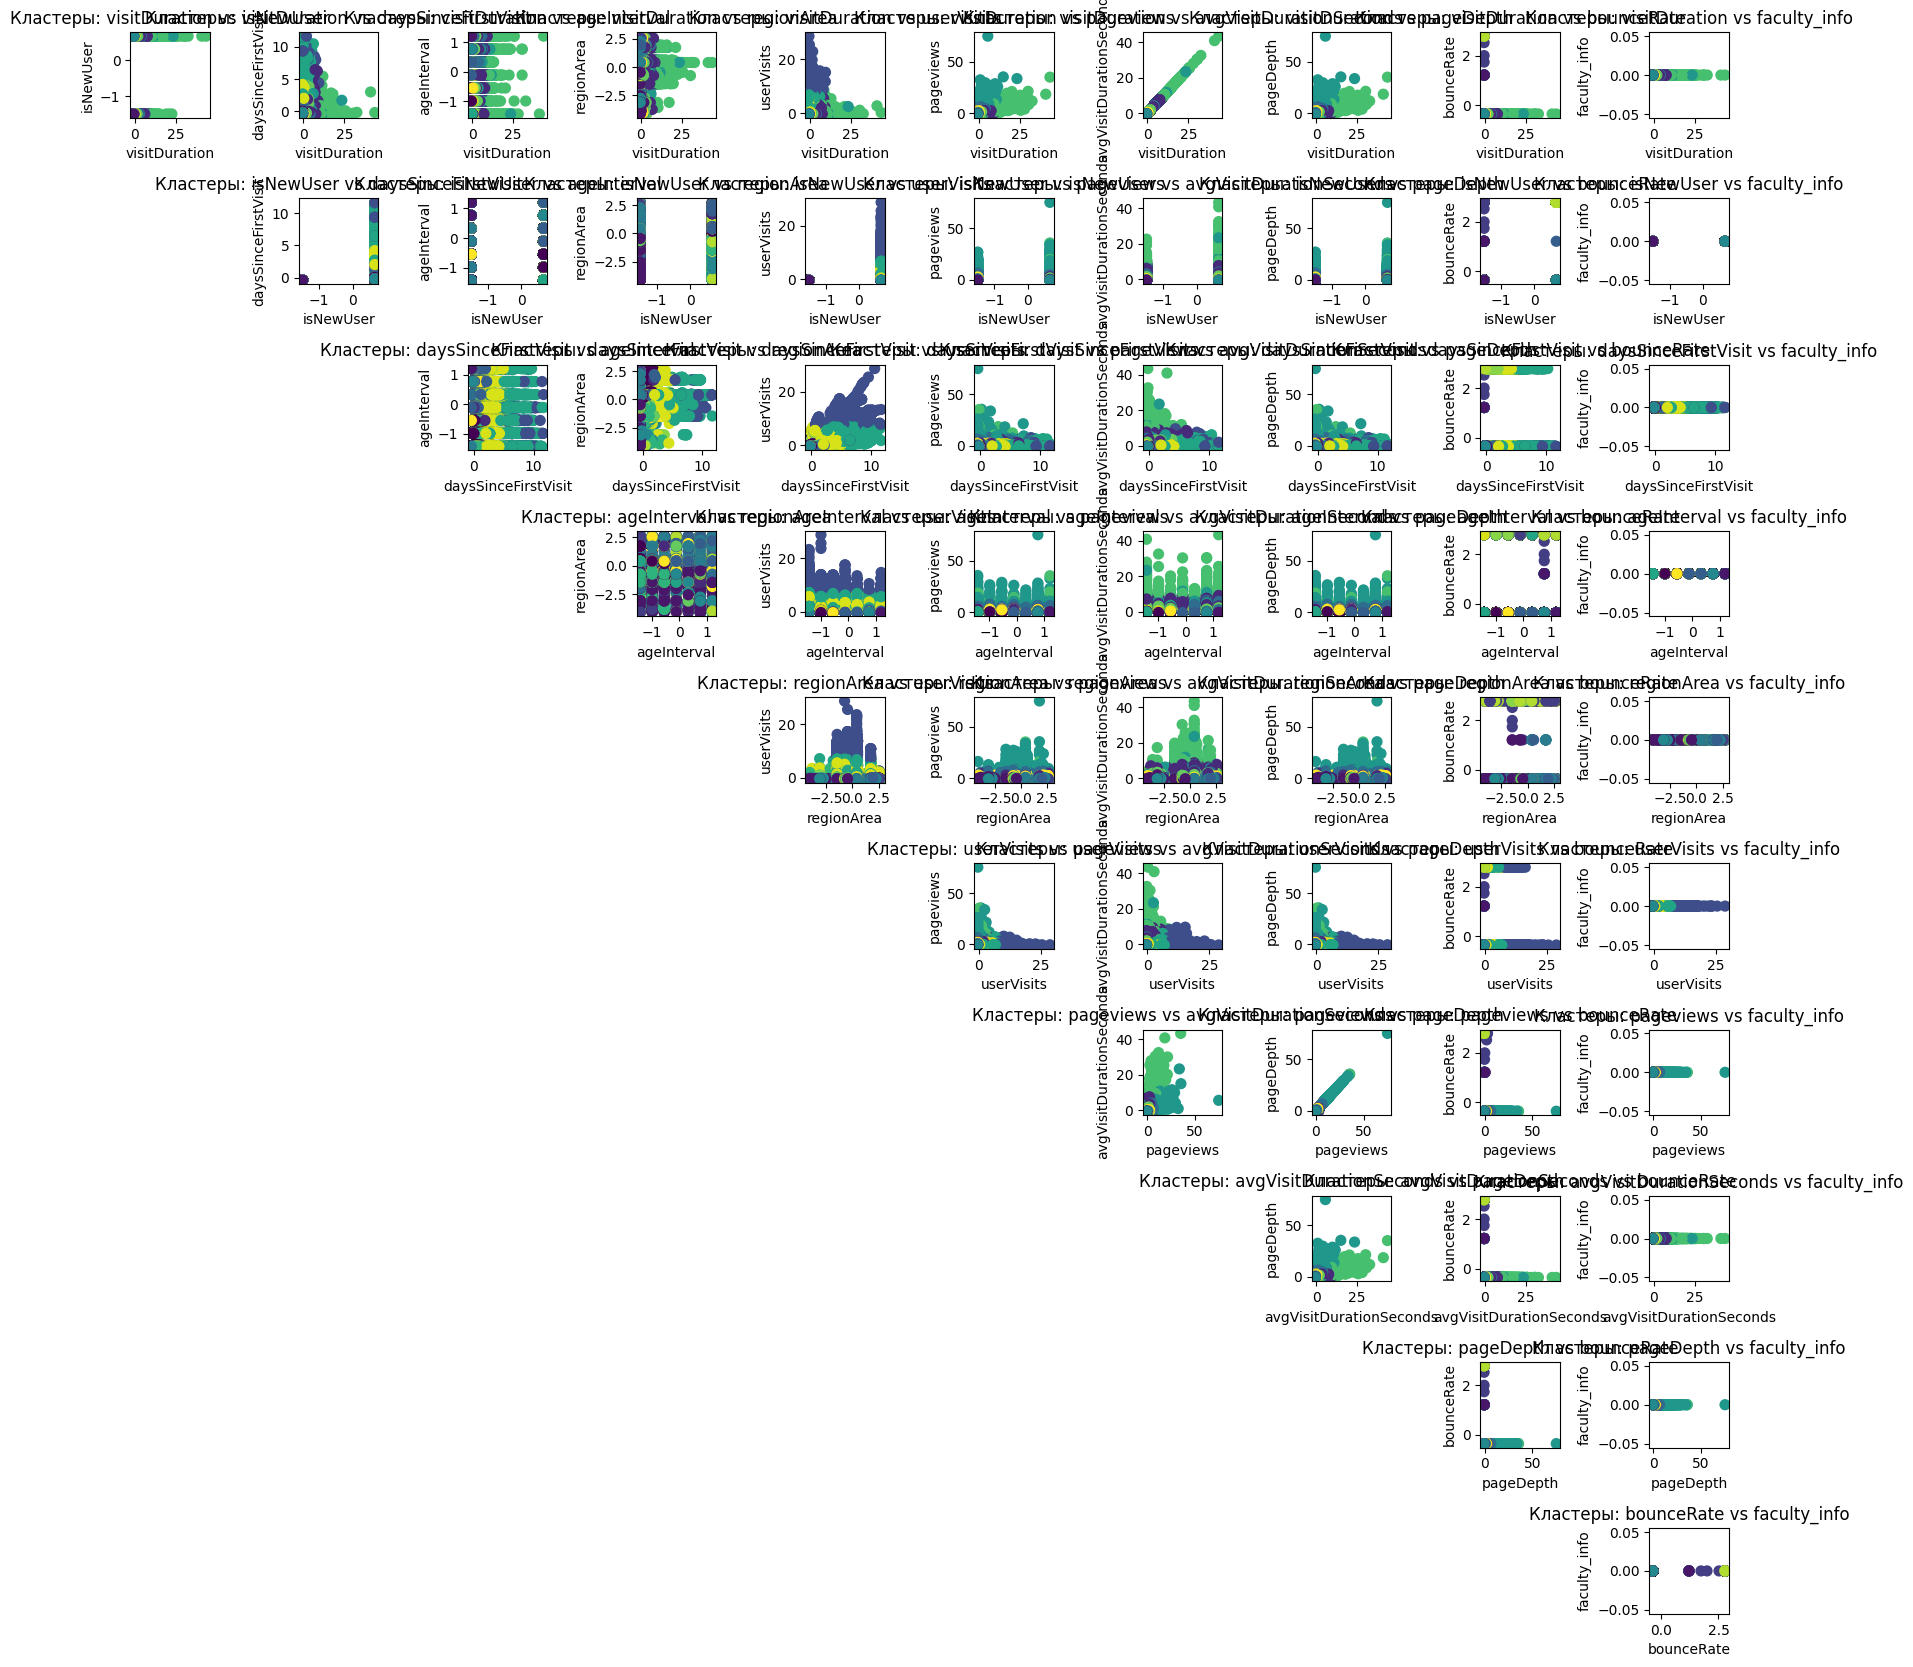

In [22]:
data_postuplenie_numeric = data_postuplenie.select_dtypes(include=[np.number])

n_clusters = 18
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_postuplenie_numeric)

data_postuplenie_numeric['cluster'] = clusters

print(f"Количество найденных кластеров: {n_clusters}")
print(f"Метки кластеров (первые 100): {clusters[:100]}")
sns.pairplot(data_postuplenie_numeric, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Попарная визуализация признаков по кластерам', y=1.02)
plt.show()

num_features = data_postuplenie_numeric.shape[1] - 1  # Без учета столбца с кластерами
plt.figure(figsize=(18, 18))
for i in range(num_features):
    for j in range(i + 1, num_features):
        plt.subplot(num_features, num_features, i * num_features + j + 1)
        plt.scatter(data_postuplenie_numeric.iloc[:, i], data_postuplenie_numeric.iloc[:, j], c=clusters, cmap='viridis', s=50)
        plt.xlabel(data_postuplenie_numeric.columns[i])
        plt.ylabel(data_postuplenie_numeric.columns[j])
        plt.title(f'Кластеры: {data_postuplenie_numeric.columns[i]} vs {data_postuplenie_numeric.columns[j]}')
plt.tight_layout()
plt.show()



In [23]:
score = silhouette_score(data_postuplenie_numeric.drop(columns=['cluster']), clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.28993937370271466


In [24]:
db_index = davies_bouldin_score(data_postuplenie_numeric.drop(columns=['cluster']), clusters)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.1637327543342912


In [25]:
len(clusters)

366857

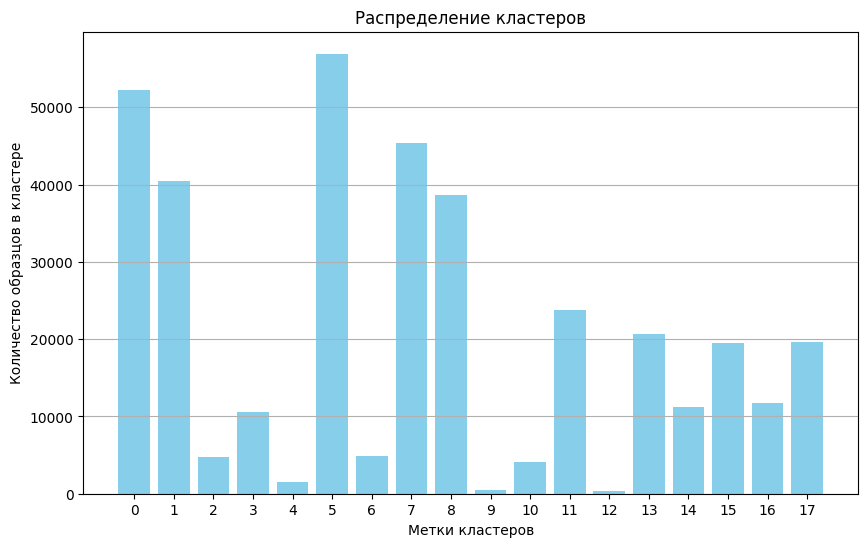

In [26]:
unique_clusters, counts = np.unique(clusters, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_clusters, counts, color='skyblue')
plt.title('Распределение кластеров')
plt.xlabel('Метки кластеров')
plt.ylabel('Количество образцов в кластере')
plt.xticks(unique_clusters)
plt.grid(axis='y')

plt.show()


In [27]:
counts

array([52189, 40444,  4787, 10552,  1470, 56917,  4942, 45391, 38666,
         500,  4168, 23763,   359, 20713, 11154, 19486, 11790, 19566])

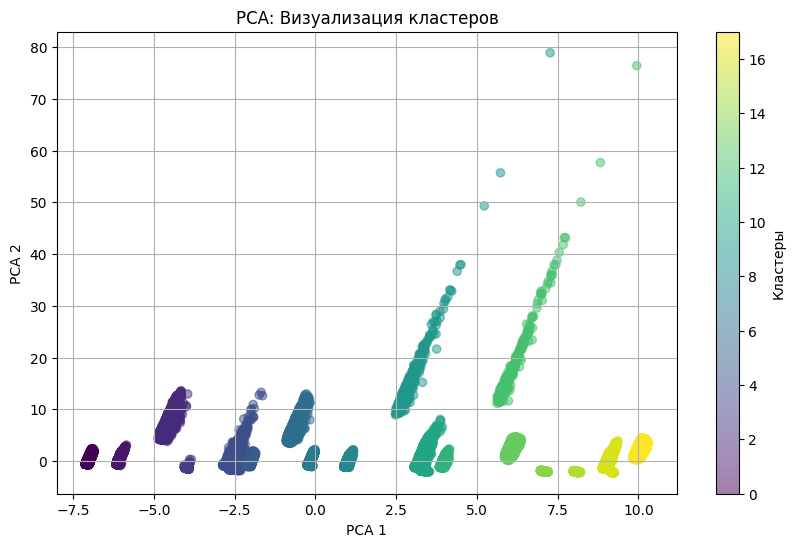

In [28]:
pca = PCA(n_components=2)
data_postuplenie_reduced = pca.fit_transform(data_postuplenie_numeric)

plt.figure(figsize=(10, 6))
plt.scatter(data_postuplenie_reduced[:, 0], data_postuplenie_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA: Визуализация кластеров')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.colorbar(label='Кластеры')
plt.show()


In [29]:
import pandas as pd
from IPython.display import display

# Примерные данные с кластерами (замените на ваш DataFrame)
# Предположим, что столбец 'cluster' содержит метки кластеров
sampled_data = data_postuplenie_numeric.groupby('cluster').apply(lambda x: x.sample(5)).reset_index(drop=True)

# Цикл для форматированного вывода с разделителем
for cluster_label, group in sampled_data.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(group)
    print('--------------------------------------')


Cluster 0:


/tmp/ipykernel_30/1767129025.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data_postuplenie_numeric.groupby('cluster').apply(lambda x: x.sample(5)).reset_index(drop=True)


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
0,-0.484169,0.666103,0.934875,-0.985733,0.403953,1.211421,-0.358669,-0.484169,-0.357623,-0.35886,0.0,0
1,-0.479338,0.666103,-0.187310,-1.423144,0.403953,-0.158157,-0.358669,-0.479338,-0.357623,-0.35886,0.0,0
2,-0.442298,0.666103,-0.321972,-1.423144,0.403953,-0.192397,0.115581,-0.442298,0.116547,-0.35886,0.0,0
3,-0.334399,0.666103,-0.375837,-1.423144,0.403953,-0.295115,-0.358669,-0.334399,-0.357623,-0.35886,0.0,0
4,-0.126654,0.666103,-0.304017,-1.423144,0.403953,0.115758,-0.121544,-0.126654,-0.120538,-0.35886,0.0,0


--------------------------------------
Cluster 1:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
5,-0.453571,-1.501269,-0.393792,0.763913,-0.639606,-0.346474,-0.595795,-0.453571,-0.594708,-0.35886,0.0,1
6,0.973266,-1.501269,-0.393792,-1.423144,-1.461130,-0.346474,0.589832,0.973266,0.590717,-0.35886,0.0,1
7,-0.001041,-1.501269,-0.393792,0.763913,-0.750623,-0.346474,-0.358669,-0.001041,-0.357623,-0.35886,0.0,1
8,-0.421362,-1.501269,-0.393792,0.763913,-0.461979,-0.346474,-0.595795,-0.421362,-0.594708,-0.35886,0.0,1
9,-0.461623,-1.501269,-0.393792,0.763913,-0.750623,-0.346474,-0.595795,-0.461623,-0.594708,-0.35886,0.0,1


--------------------------------------
Cluster 2:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
10,5.342349,0.666103,-0.034693,1.201325,1.736155,0.886146,3.435337,5.342349,3.435736,-0.35886,0.0,2
11,4.057230,0.666103,-0.079580,0.763913,1.736155,-0.106798,-0.121544,4.057230,-0.120538,-0.35886,0.0,2
12,4.092659,0.666103,-0.339927,0.763913,-3.126383,-0.329355,2.249710,4.092659,2.250311,-0.35886,0.0,2
13,3.891356,0.666103,1.141357,-0.110910,0.403953,-0.004080,1.064083,3.891356,1.064887,-0.35886,0.0,2
14,5.194190,0.666103,-0.025715,-0.985733,0.403953,2.392682,2.723960,5.194190,2.724481,-0.35886,0.0,2


--------------------------------------
Cluster 3:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
15,-0.469675,-1.501269,-0.393792,-1.423144,-1.461130,-0.346474,-0.595795,-0.469675,-0.594708,2.786995,0.0,3
16,-0.479338,-1.501269,-0.393792,0.763913,-0.461979,-0.346474,-0.595795,-0.479338,-0.594708,2.786995,0.0,3
17,-0.485779,-1.501269,-0.393792,0.763913,1.736155,-0.346474,-0.595795,-0.485779,-0.594708,2.786995,0.0,3
18,-0.485779,-1.501269,-0.393792,1.201325,-2.127231,-0.346474,-0.595795,-0.485779,-0.594708,2.786995,0.0,3
19,-0.485779,-1.501269,-0.393792,-0.110910,0.581580,-0.346474,-0.595795,-0.485779,-0.594708,2.786995,0.0,3


--------------------------------------
Cluster 4:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
20,-0.447129,0.666103,8.071969,-0.548321,-0.461979,12.150927,-0.358669,-0.447129,-0.357623,-0.35886,0.0,4
21,-0.456792,0.666103,6.545798,-0.110910,0.403953,9.480250,-0.595795,-0.456792,-0.594708,-0.35886,0.0,4
22,-0.429414,0.666103,6.653528,-1.423144,-0.461979,7.614199,-0.358669,-0.429414,-0.357623,-0.35886,0.0,4
23,-0.403648,0.666103,7.632073,-1.423144,-0.461979,16.430859,-0.358669,-0.403648,-0.357623,-0.35886,0.0,4
24,-0.406868,0.666103,4.355294,-0.985733,-1.461130,12.561801,-0.121544,-0.406868,-0.120538,-0.35886,0.0,4


--------------------------------------
Cluster 5:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
25,0.052103,0.666103,-0.115490,1.201325,1.736155,-0.277995,0.115581,0.052103,0.116547,-0.35886,0.0,5
26,-0.432635,0.666103,-0.133445,-0.110910,0.403953,0.047279,-0.595795,-0.432635,-0.594708,-0.35886,0.0,5
27,-0.447129,0.666103,0.001217,0.763913,0.403953,0.201357,-0.358669,-0.447129,-0.357623,-0.35886,0.0,5
28,-0.360166,0.666103,-0.259130,0.763913,0.581580,-0.158157,0.115581,-0.360166,0.116547,-0.35886,0.0,5
29,0.358083,0.666103,-0.223220,-0.110910,0.403953,-0.192397,-0.121544,0.358083,-0.120538,-0.35886,0.0,5


--------------------------------------
Cluster 6:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
30,1.596500,0.666103,-0.375837,0.763913,0.403953,-0.277995,2.961086,1.596500,2.961566,-0.35886,0.0,6
31,3.305161,-1.501269,-0.393792,0.763913,0.403953,-0.346474,3.435337,3.305161,3.435736,-0.35886,0.0,6
32,1.032852,-1.501269,-0.393792,0.763913,-1.461130,-0.346474,4.858089,1.032852,4.858246,-0.35886,0.0,6
33,0.778404,-1.501269,-0.393792,0.763913,-0.750623,-0.346474,3.672462,0.778404,3.672821,-0.35886,0.0,6
34,0.156780,-1.501269,-0.393792,0.763913,0.403953,-0.346474,4.383838,0.156780,4.384076,-0.35886,0.0,6


--------------------------------------
Cluster 7:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
35,-0.471285,-1.501269,-0.393792,1.201325,1.736155,-0.346474,-0.358669,-0.471285,-0.357623,-0.35886,0.0,7
36,-0.434246,-1.501269,-0.393792,0.763913,0.403953,-0.346474,-0.358669,-0.434246,-0.357623,-0.35886,0.0,7
37,-0.389154,-1.501269,-0.393792,-0.110910,0.403953,-0.346474,-0.358669,-0.389154,-0.357623,-0.35886,0.0,7
38,0.279173,-1.501269,-0.393792,0.763913,0.581580,-0.346474,0.589832,0.279173,0.590717,-0.35886,0.0,7
39,-0.464844,-1.501269,-0.393792,0.763913,0.403953,-0.346474,-0.358669,-0.464844,-0.357623,-0.35886,0.0,7


--------------------------------------
Cluster 8:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
40,-0.461623,0.666103,-0.393792,0.763913,-0.750623,-0.312235,-0.595795,-0.461623,-0.594708,-0.35886,0.0,8
41,-0.461623,0.666103,-0.393792,-0.110910,-1.461130,-0.329355,-0.595795,-0.461623,-0.594708,-0.35886,0.0,8
42,-0.461623,0.666103,-0.330950,0.763913,-0.461979,-0.158157,-0.595795,-0.461623,-0.594708,-0.35886,0.0,8
43,-0.408479,0.666103,-0.178332,0.763913,-0.750623,-0.055439,-0.121544,-0.408479,-0.120538,-0.35886,0.0,8
44,0.131014,0.666103,-0.079580,0.763913,-1.461130,-0.243756,0.352707,0.131014,0.353632,-0.35886,0.0,8


--------------------------------------
Cluster 9:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
45,3.644961,-1.501269,-0.393792,0.763913,-0.750623,-0.346474,19.085612,3.644961,19.083343,-0.35886,0.0,9
46,3.134456,0.666103,-0.088558,-1.423144,0.403953,-0.055439,12.920352,3.134456,12.919134,-0.35886,0.0,9
47,6.094417,-1.501269,-0.393792,-1.423144,-0.461979,-0.346474,10.074847,6.094417,10.074115,-0.35886,0.0,9
48,4.253702,0.666103,-0.133445,1.201325,0.403953,-0.038319,7.940719,4.253702,7.940350,-0.35886,0.0,9
49,3.804393,-1.501269,-0.393792,0.763913,0.403953,-0.346474,14.105979,3.804393,14.104559,-0.35886,0.0,9


--------------------------------------
Cluster 10:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
50,-0.461623,0.666103,5.899420,-1.423144,-1.461130,1.725013,-0.595795,-0.461623,-0.594708,-0.35886,0.0,10
51,-0.460012,0.666103,6.608641,-0.985733,0.403953,6.261741,-0.595795,-0.460012,-0.594708,-0.35886,0.0,10
52,-0.186240,0.666103,6.168744,-1.423144,0.403953,7.134847,0.352707,-0.186240,0.353632,-0.35886,0.0,10
53,-0.453571,0.666103,4.723370,-0.985733,0.403953,3.402746,-0.358669,-0.453571,-0.357623,-0.35886,0.0,10
54,0.193820,0.666103,6.402159,-0.110910,-0.461979,1.827731,0.115581,0.193820,0.116547,-0.35886,0.0,10


--------------------------------------
Cluster 11:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
55,-0.439077,0.666103,1.284996,-1.423144,-1.461130,-0.038319,-0.595795,-0.439077,-0.594708,-0.35886,0.0,11
56,-0.474506,0.666103,-0.241175,-1.423144,-1.461130,0.235596,-0.121544,-0.474506,-0.120538,-0.35886,0.0,11
57,-0.471285,0.666103,-0.079580,-1.423144,-0.461979,-0.192397,-0.358669,-0.471285,-0.357623,-0.35886,0.0,11
58,-0.427804,0.666103,-0.223220,-0.985733,-0.461979,-0.243756,-0.358669,-0.427804,-0.357623,-0.35886,0.0,11
59,-0.398816,0.666103,-0.196287,-1.423144,-1.461130,-0.209517,-0.358669,-0.398816,-0.357623,-0.35886,0.0,11


--------------------------------------
Cluster 12:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
60,8.851465,0.666103,-0.160377,1.201325,0.403953,0.783428,3.672462,8.851465,3.672821,-0.35886,0.0,12
61,25.530637,0.666103,-0.097535,-0.985733,0.403953,-0.243756,7.940719,25.530637,7.940350,-0.35886,0.0,12
62,10.648700,0.666103,-0.384814,-1.423144,0.403953,-0.312235,1.538334,10.648700,1.539056,-0.35886,0.0,12
63,15.679667,0.666103,-0.016738,-1.423144,0.403953,0.184237,5.569465,15.679667,5.569501,-0.35886,0.0,12
64,8.778996,-1.501269,-0.393792,0.763913,-3.126383,-0.346474,7.466468,8.778996,7.466180,-0.35886,0.0,12


--------------------------------------
Cluster 13:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
65,1.768816,0.666103,0.064059,-1.423144,0.403953,-0.089678,1.538334,1.768816,1.539056,-0.35886,0.0,13
66,2.021653,-1.501269,-0.393792,0.763913,0.403953,-0.346474,0.115581,2.021653,0.116547,-0.35886,0.0,13
67,1.546577,-1.501269,-0.393792,0.763913,-0.750623,-0.346474,0.826957,1.546577,0.827802,-0.35886,0.0,13
68,1.860610,-1.501269,-0.393792,0.763913,1.736155,-0.346474,0.352707,1.860610,0.353632,-0.35886,0.0,13
69,1.900871,0.666103,0.064059,-1.423144,0.403953,1.382618,-0.121544,1.900871,-0.120538,-0.35886,0.0,13


--------------------------------------
Cluster 14:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
70,-0.485779,0.666103,-0.393792,-0.985733,-0.750623,-0.329355,-0.595795,-0.485779,-0.594708,2.786995,0.0,14
71,-0.485779,0.666103,0.818168,-1.423144,0.403953,0.167117,-0.595795,-0.485779,-0.594708,2.786995,0.0,14
72,-0.485779,0.666103,-0.348904,-1.423144,-1.461130,-0.260876,-0.595795,-0.485779,-0.594708,2.786995,0.0,14
73,-0.472896,0.666103,-0.259130,-1.423144,-0.461979,-0.106798,-0.595795,-0.472896,-0.594708,2.786995,0.0,14
74,-0.479338,0.666103,-0.321972,-1.423144,0.403953,-0.260876,-0.595795,-0.479338,-0.594708,2.786995,0.0,14


--------------------------------------
Cluster 15:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
75,-0.485779,0.666103,-0.375837,1.201325,0.248529,-0.329355,-0.595795,-0.485779,-0.594708,2.786995,0.0,15
76,-0.485779,0.666103,-0.241175,0.763913,-1.461130,-0.312235,-0.595795,-0.485779,-0.594708,2.786995,0.0,15
77,-0.485779,0.666103,-0.393792,0.763913,-0.461979,-0.312235,-0.595795,-0.485779,-0.594708,2.786995,0.0,15
78,-0.485779,0.666103,-0.393792,0.763913,1.736155,-0.329355,-0.595795,-0.485779,-0.594708,2.786995,0.0,15
79,-0.485779,0.666103,-0.312995,0.763913,-0.750623,-0.192397,-0.595795,-0.485779,-0.594708,2.786995,0.0,15


--------------------------------------
Cluster 16:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
80,-0.437466,0.666103,0.961807,0.326502,0.403953,6.912290,-0.358669,-0.437466,-0.357623,-0.35886,0.0,16
81,-0.443908,0.666103,1.671028,-0.110910,0.403953,1.570935,-0.121544,-0.443908,-0.120538,-0.35886,0.0,16
82,-0.464844,0.666103,1.554321,-0.548321,-0.461979,0.663590,-0.595795,-0.464844,-0.594708,-0.35886,0.0,16
83,-0.460012,0.666103,2.371271,-1.423144,0.403953,1.861971,-0.595795,-0.460012,-0.594708,-0.35886,0.0,16
84,-0.358556,0.666103,0.863055,-0.985733,0.403953,3.334267,-0.358669,-0.358556,-0.357623,-0.35886,0.0,16


--------------------------------------
Cluster 17:


,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
85,-0.076731,-1.501269,-0.393792,-1.423144,-0.461979,-0.346474,1.064083,-0.076731,1.064887,-0.35886,0.0,17
86,0.142287,-1.501269,-0.393792,-0.548321,-1.461130,-0.346474,2.723960,0.142287,2.724481,-0.35886,0.0,17
87,0.121351,-1.501269,-0.393792,-0.985733,-1.461130,-0.346474,2.012584,0.121351,2.013226,-0.35886,0.0,17
88,0.039219,-1.501269,-0.393792,0.763913,1.958188,-0.346474,1.538334,0.039219,1.539056,-0.35886,0.0,17
89,0.037609,-1.501269,-0.393792,0.763913,0.403953,-0.346474,1.538334,0.037609,1.539056,-0.35886,0.0,17


--------------------------------------


In [30]:
data_postuplenie_numeric

,visitDuration,isNewUser,daysSinceFirstVisit,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
0,-0.469675,-1.501269,-0.393792,-0.110910,0.248529,-0.346474,-0.358669,-0.469675,-0.357623,-0.35886,0.0,7
1,-0.453571,-1.501269,-0.393792,-0.548321,-1.438927,-0.346474,-0.358669,-0.453571,-0.357623,-0.35886,0.0,1
3,-0.437466,-1.501269,-0.393792,-1.423144,0.403953,-0.346474,-0.358669,-0.437466,-0.357623,-0.35886,0.0,7
4,-0.030029,0.666103,-0.393792,-1.423144,0.403953,-0.329355,1.301208,-0.030029,1.301971,-0.35886,0.0,17
16,-0.327958,-1.501269,-0.393792,0.763913,-0.461979,-0.346474,0.115581,-0.327958,0.116547,-0.35886,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1411433,-0.410089,0.666103,-0.304017,-0.985733,0.403953,-0.312235,0.115581,-0.410089,0.116547,-0.35886,0.0,0
1411434,-0.397206,0.666103,-0.151400,0.763913,0.403953,-0.329355,-0.595795,-0.397206,-0.594708,-0.35886,0.0,5
1411435,-0.255488,-1.501269,-0.393792,0.763913,0.403953,-0.346474,0.826957,-0.255488,0.827802,-0.35886,0.0,7
1411449,-0.440687,-1.501269,-0.393792,0.763913,-0.461979,-0.346474,-0.358669,-0.440687,-0.357623,-0.35886,0.0,1


In [31]:
len(clusters)

366857

In [33]:
clusters

array([7, 1, 7, ..., 7, 1, 8], dtype=int32)

In [34]:
data_postuplenie_for_save['cluster'] = clusters
data_postuplenie_for_save.to_csv('/kaggle/working/data_with_clusters.csv', index=False)

In [35]:
data_postuplenie_for_save

,date,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info,cluster
0,2020-06-25,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0,postuplenie,7
1,2020-06-25,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0,postuplenie,1
3,2020-06-25,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0,postuplenie,7
4,2020-06-25,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0,postuplenie,17
16,2020-06-25,98,New users,0,http://nosu.ru/abiturientam/postuplenie/bakala...,0000-00-00,Not specified,Not specified,1,4.0,98.0,4.0,0.0,postuplenie,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411433,2024-03-01,47,Returning users,10,https://nosu.ru/abiturientam/postuplenie/,2024-03-01,Age 25‑34,Republic of North Ossetia — Alania,3,4.0,47.0,4.0,0.0,postuplenie,0
1411434,2024-03-01,55,Returning users,27,https://nosu.ru/abiturientam/postuplenie/,2024-02-02,Not specified,Republic of North Ossetia — Alania,2,1.0,55.0,1.0,0.0,postuplenie,5
1411435,2024-03-01,143,New users,0,https://nosu.ru/abiturientam/postuplenie/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,7.0,143.0,7.0,0.0,postuplenie,7
1411449,2024-03-01,28,New users,0,https://nosu.ru/abiturientam/postuplenie/,0000-00-00,Not specified,Not specified,1,2.0,28.0,2.0,0.0,postuplenie,1


In [36]:
data_postuplenie_for_save.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366857 entries, 0 to 1411458
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     366857 non-null  datetime64[ns]
 1   visitDuration            366857 non-null  int64         
 2   isNewUser                366857 non-null  object        
 3   daysSinceFirstVisit      366857 non-null  int64         
 4   endURL                   366857 non-null  object        
 5   previousVisitDate        366857 non-null  object        
 6   ageInterval              366857 non-null  object        
 7   regionArea               366857 non-null  object        
 8   userVisits               366857 non-null  int64         
 9   pageviews                366857 non-null  float64       
 10  avgVisitDurationSeconds  366857 non-null  float64       
 11  pageDepth                366857 non-null  float64       
 12  bounceRate          

In [38]:
data_postuplenie_for_save.describe()

,date,visitDuration,daysSinceFirstVisit,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,cluster
count,366857,366857.000000,366857.000000,366857.000000,366857.000000,366857.000000,366857.000000,366857.000000,366857.000000
mean,2022-01-27 02:03:17.969236224,301.646603,43.864421,21.238311,3.512573,301.646603,3.508418,11.407397,7.031933
min,2020-06-25 00:00:00,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2021-03-17 00:00:00,15.000000,0.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000
50%,2021-11-09 00:00:00,56.000000,6.000000,4.000000,2.000000,56.000000,2.000000,0.000000,7.000000
75%,2022-11-19 00:00:00,296.000000,37.000000,17.000000,4.000000,296.000000,4.000000,0.000000,11.000000
max,2024-03-01 00:00:00,27273.000000,1342.000000,1698.000000,320.000000,27273.000000,320.000000,100.000000,17.000000
std,NaN,620.954925,111.390015,58.412222,4.217184,620.954925,4.217903,31.787906,5.341115


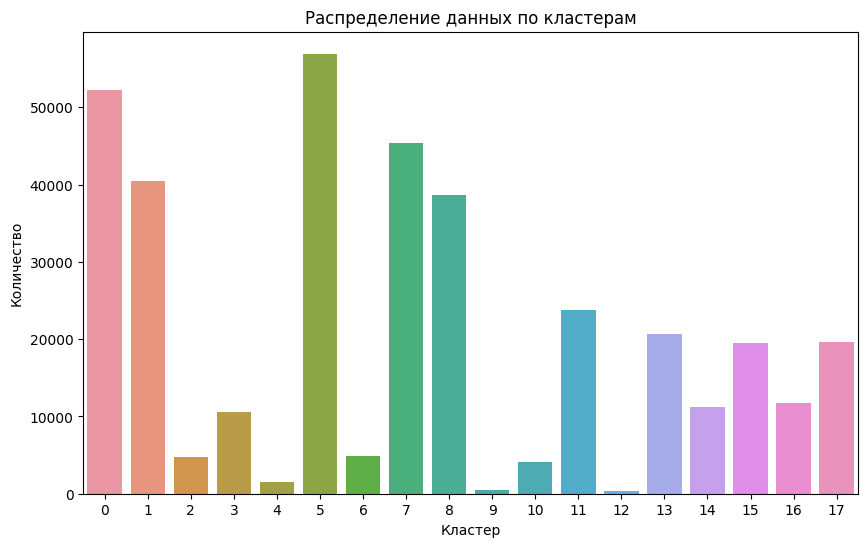

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_postuplenie_for_save, x='cluster')
plt.title("Распределение данных по кластерам")
plt.xlabel("Кластер")
plt.ylabel("Количество")
plt.show()

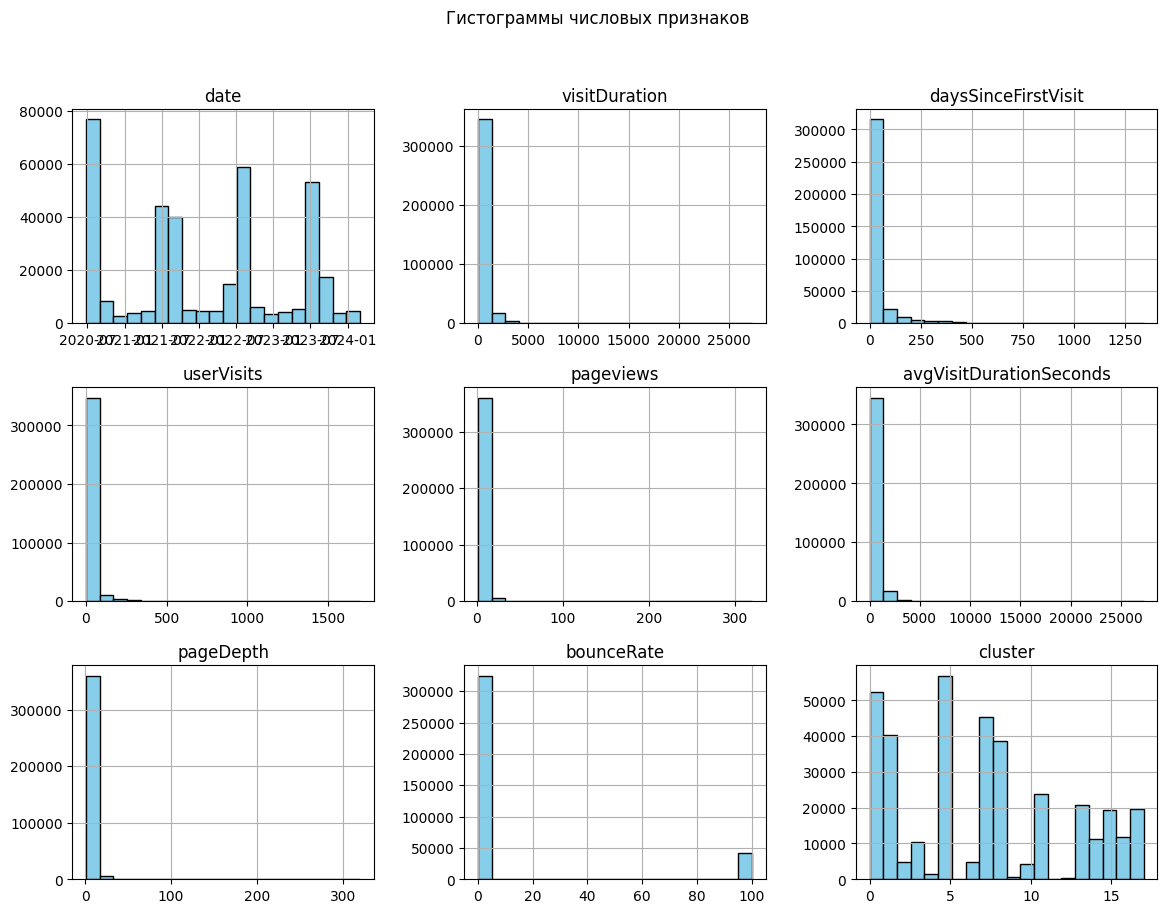

In [41]:
data_postuplenie_for_save.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Гистограммы числовых признаков")
plt.show()